In [1]:
import nidaqmx as ni
import nidaqmx.system
import numpy as np
import visa
import time
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
# print("Information about the NI device we're using (6014) and the driver 
#       that's installed on the lab machine for it:\n")
# system = nidaqmx.system.System.local()
# print(system.driver_version)

# for device in system.devices:
#     print(device)

# voltage = []
# with nidaqmx.Task() as task:
    
#     task.ai_channels.add_ai_voltage_chan("6014_Dev1/ai0")
    
#     for t in range(50):
#         voltage.append(task.read()) # number_of_samples_per_channel=1
#         time.sleep(0.01)
        
# print(voltage)

# t = range(50)
# plt.plot(t, voltage)
# plt.show()

# nidaqmx.system.PhysicalChannel('Dev1/ai0')

# from nidaqmx.constants import LineGrouping
# with nidaqmx.Task() as task:
#     task.di_channels.add_di_chan("6014_Dev1/port0/line0:1", line_grouping=LineGrouping.CHAN_PER_LINE)
#     print(task.read(number_of_samples_per_channel=2))

## Now using GPIB connection instead of NI DAQ system

In [13]:
rm = visa.ResourceManager()
my_instrument = rm.open_resource('GPIB0::3::INSTR')

In [47]:
time_start = time.perf_counter()
meas_time = 10 # In seconds
t = []
voltage = []

while time.perf_counter() <= time_start + meas_time:
    t.append(time.perf_counter())
    voltage.append(float(my_instrument.query('MEAS:VOLT:DC?')))
    
t = [x-t[0] for x in t]

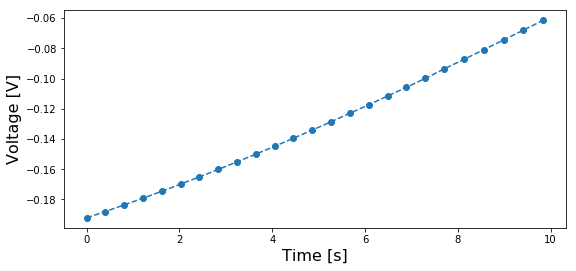

In [48]:
fig, ax = plt.subplots(figsize=(9,4))
ax.plot(t, voltage, 'o--')
ax.set_xlabel('Time [s]', fontsize=16)
ax.set_ylabel('Voltage [V]', fontsize=16)

plt.show()

In [49]:
print(np.ediff1d(np.asarray(t)))

[0.40276125 0.40540882 0.40575142 0.40564185 0.40532943 0.40587971
 0.40548005 0.40546828 0.40588786 0.40580243 0.40514349 0.40582296
 0.40574569 0.40592589 0.40575836 0.40544504 0.40591442 0.40590989
 0.405423   0.42772917 0.42732046 0.427571   0.42745659 0.42750761]
